In [25]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train = pd.read_csv('data/train.csv')

In [27]:
# 개인정보를 나열한 칼럼 ID 추가 (만약 여기서 credit도 추가하게 되면 고유 ID가 12099명으로 증가함)
# 12099명으로 증가하는 경우는 유추하자면 credit 정보가 최신화되지 않았기 때문에 발생한다.
# 따라서 가장 최근의 credit을 user_list로 반영하기 위한 작업을 실시한다.
# 과거와 최근을 구별하는 방법은 bigin_month(카드 생성 후 기간)을 기준으로 시행한다.

train['ID'] = train['gender'].astype(str) + ' & ' + train['car'].astype(str) + ' & ' + train['reality'].astype(str) + ' & ' + \
                train['child_num'].astype(str) + ' & ' + train['income_total'].astype(str) + ' & ' + train['income_type'].astype(str) + ' & ' + \
                    train['edu_type'].astype(str) + ' & ' + train['family_type'].astype(str) + ' & ' + train['house_type'].astype(str) + ' & ' + \
                        train['DAYS_BIRTH'].astype(str) + ' & ' + train['DAYS_EMPLOYED'].astype(str) + ' & ' + train['work_phone'].astype(str) + ' & ' + \
                            train['phone'].astype(str) + ' & ' + train['email'].astype(str)  + ' & ' + train['family_size'].astype(str)
#쓸모없는 칼럼 삭제
train.drop(['FLAG_MOBIL'], axis=1, inplace=True)   
train.drop(columns=['index'], inplace=True)

In [28]:
# 카드 가입일자는 음의 값이므로 False로 ID도 정렬해봄 (최신의 credit을 반영하기 위한 작업)
train = train.sort_values(['begin_month', 'ID'], ascending=[False, True])

In [29]:
# ID 중복되는 경우 True, 중복안된 고유값은 False로 설정하여 그 값의 개수를 확인한다
# ID_TF 칼럼을 형성하여 True, False를 반영해준다.
ID = train.duplicated(['ID'])
train['ID_TF'] = ID
train['ID_TF'].value_counts()

True     17698
False     8759
Name: ID_TF, dtype: int64

In [30]:
train = train.reset_index(inplace=False)
train.drop(columns='index', inplace=True)

In [31]:
# card_num이라는 카드 개수를 추가하였음 (ID가 같은데 카드 개수가 여러 개인 사람을 대상으로 카드 개수를 구해서 데이터에 반영한다)

for i in tqdm(range(len(train))):
    a = train.iloc[i]['ID']
    b = len(train[train['ID']==a])
    train.loc[(train['ID']==a), 'card_num'] =  b

100%|██████████| 26457/26457 [04:13<00:00, 104.51it/s]


In [32]:
#8759만 추출한 데이터프레임 (begin_month를 기준으로 최근의 credit을 반영)
user_list = train.query('ID_TF == False')

#reset index
user_list = user_list.reset_index(inplace=False)
user_list.drop(columns='index', inplace=True)

In [33]:
user_list

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID,ID_TF,card_num
0,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,With parents,-11453,...,0,0,0,Medicine staff,2.0,0.0,1.0,F & N & N & 0 & 112500.0 & Commercial associat...,False,1.0
1,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15499,...,0,0,0,Private service staff,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,False,5.0
2,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-19003,...,0,0,0,Medicine staff,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,False,2.0
3,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,With parents,-12278,...,0,0,0,NaN,2.0,0.0,0.0,F & N & N & 0 & 135000.0 & Working & Secondary...,False,8.0
4,F,N,N,0,157500.0,State servant,Higher education,Married,House / apartment,-11588,...,1,1,0,Core staff,2.0,0.0,0.0,F & N & N & 0 & 157500.0 & State servant & Hig...,False,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,M,Y,N,3,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15262,...,0,0,0,Managers,5.0,-60.0,2.0,M & Y & N & 3 & 360000.0 & Commercial associat...,False,1.0
8755,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12167,...,1,0,0,Drivers,2.0,-60.0,2.0,M & Y & Y & 0 & 112500.0 & Working & Secondary...,False,1.0
8756,M,Y,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17847,...,0,0,0,Laborers,2.0,-60.0,0.0,M & Y & Y & 0 & 270000.0 & Commercial associat...,False,1.0
8757,M,Y,Y,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-18661,...,0,0,0,Managers,2.0,-60.0,2.0,M & Y & Y & 0 & 315000.0 & Commercial associat...,False,1.0


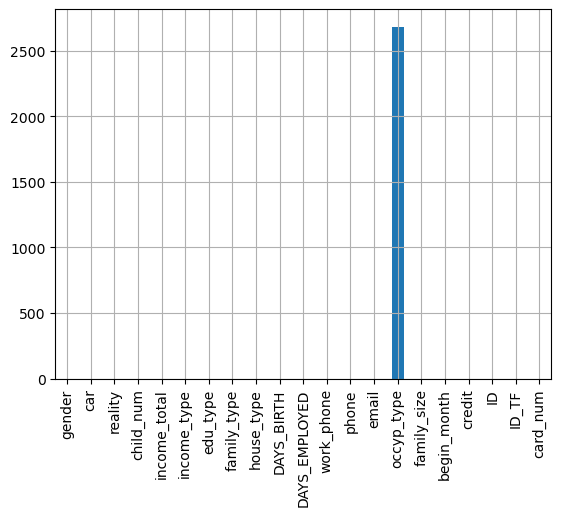

In [34]:
user_list.isna().sum().plot(kind = 'bar') #직업종류만 결측치 존재 어떤식으로 채울지 
plt.grid()
plt.show()

In [35]:
user_list.drop(columns=['ID_TF'], inplace=True)

In [36]:
user_list.to_csv('data/user_list_GH1.csv')